# Data Preparation

In [61]:
import numpy as np
import pandas as pd
import math
import statistics
import time
import matplotlib as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score

import plotly.figure_factory as ff
import plotly.express as px

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import time
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

In [2]:
#train= pd.read_csv('train_timeseries.csv') # 2000-2016
#test= pd.read_csv('test_timeseries.csv') # 2017-2018
#validate= pd.read_csv('validation_timeseries.csv') # 2019-2020
#soil= pd.read_csv('soil_data.csv')
# county = pd.read_csv('Fips, county,state.csv') 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train= pd.read_csv('/content/drive/MyDrive/423 Big Data Analytics/Final Project/train_timeseries.csv') # 2000-2016
test= pd.read_csv('/content/drive/MyDrive/423 Big Data Analytics/Final Project/test_timeseries.csv') # 2017-2018
validate= pd.read_csv('/content/drive/MyDrive/423 Big Data Analytics/Final Project/validation_timeseries.csv') # 2019-2020
soil= pd.read_csv('/content/drive/MyDrive/423 Big Data Analytics/Final Project/soil_data.csv')
# county = pd.read_csv('Fips, county,state.csv') 

In [5]:
train=train.dropna()
test=test.dropna()
validate=validate.dropna()

In [6]:
train

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
10,1001,2000-01-11,1.33,100.40,6.63,11.48,7.84,7.84,18.88,5.72,13.16,10.43,1.76,2.48,1.05,1.43,3.55,6.38,1.71,4.67,2.0
17,1001,2000-01-18,1.11,100.39,9.53,14.28,13.26,13.26,18.04,8.98,9.06,14.19,2.63,3.60,1.67,1.92,5.19,6.40,3.84,2.55,2.0
24,1001,2000-01-25,0.00,100.11,2.05,-0.78,-7.93,-7.72,5.65,-5.46,11.11,-0.61,3.35,4.59,2.28,2.32,5.75,8.03,3.96,4.07,2.0
31,1001,2000-02-01,0.00,101.00,3.36,2.06,-1.73,-1.70,11.02,-4.21,15.23,1.88,2.03,2.74,0.88,1.86,4.18,6.38,1.27,5.11,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19300647,56043,2016-11-29,0.04,82.47,2.19,-4.27,-9.36,-9.26,-1.51,-7.22,5.71,-4.38,6.93,10.27,3.08,7.18,9.42,12.59,5.62,6.97,0.0
19300654,56043,2016-12-06,0.13,82.59,0.91,-11.96,-18.65,-17.90,-6.85,-15.24,8.39,-11.98,2.27,3.97,0.95,3.02,3.07,5.16,0.83,4.33,0.0
19300661,56043,2016-12-13,0.02,82.86,1.40,-9.56,-14.18,-13.95,-2.69,-13.01,10.32,-10.95,3.64,6.59,1.28,5.31,5.33,8.35,2.13,6.22,0.0
19300668,56043,2016-12-20,0.32,83.12,2.73,-2.55,-6.90,-6.84,2.66,-7.77,10.42,-3.94,6.16,8.43,3.44,4.99,8.99,10.14,6.67,3.47,0.0


In [7]:
# create a drought level column
level=[]
for i in train['score']:
     level.append(math.floor(i))

In [8]:
train['level'] = level
train

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,level
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0,1
10,1001,2000-01-11,1.33,100.40,6.63,11.48,7.84,7.84,18.88,5.72,13.16,10.43,1.76,2.48,1.05,1.43,3.55,6.38,1.71,4.67,2.0,2
17,1001,2000-01-18,1.11,100.39,9.53,14.28,13.26,13.26,18.04,8.98,9.06,14.19,2.63,3.60,1.67,1.92,5.19,6.40,3.84,2.55,2.0,2
24,1001,2000-01-25,0.00,100.11,2.05,-0.78,-7.93,-7.72,5.65,-5.46,11.11,-0.61,3.35,4.59,2.28,2.32,5.75,8.03,3.96,4.07,2.0,2
31,1001,2000-02-01,0.00,101.00,3.36,2.06,-1.73,-1.70,11.02,-4.21,15.23,1.88,2.03,2.74,0.88,1.86,4.18,6.38,1.27,5.11,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19300647,56043,2016-11-29,0.04,82.47,2.19,-4.27,-9.36,-9.26,-1.51,-7.22,5.71,-4.38,6.93,10.27,3.08,7.18,9.42,12.59,5.62,6.97,0.0,0
19300654,56043,2016-12-06,0.13,82.59,0.91,-11.96,-18.65,-17.90,-6.85,-15.24,8.39,-11.98,2.27,3.97,0.95,3.02,3.07,5.16,0.83,4.33,0.0,0
19300661,56043,2016-12-13,0.02,82.86,1.40,-9.56,-14.18,-13.95,-2.69,-13.01,10.32,-10.95,3.64,6.59,1.28,5.31,5.33,8.35,2.13,6.22,0.0,0
19300668,56043,2016-12-20,0.32,83.12,2.73,-2.55,-6.90,-6.84,2.66,-7.77,10.42,-3.94,6.16,8.43,3.44,4.99,8.99,10.14,6.67,3.47,0.0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5afe0762d0>,
      dtype=object)

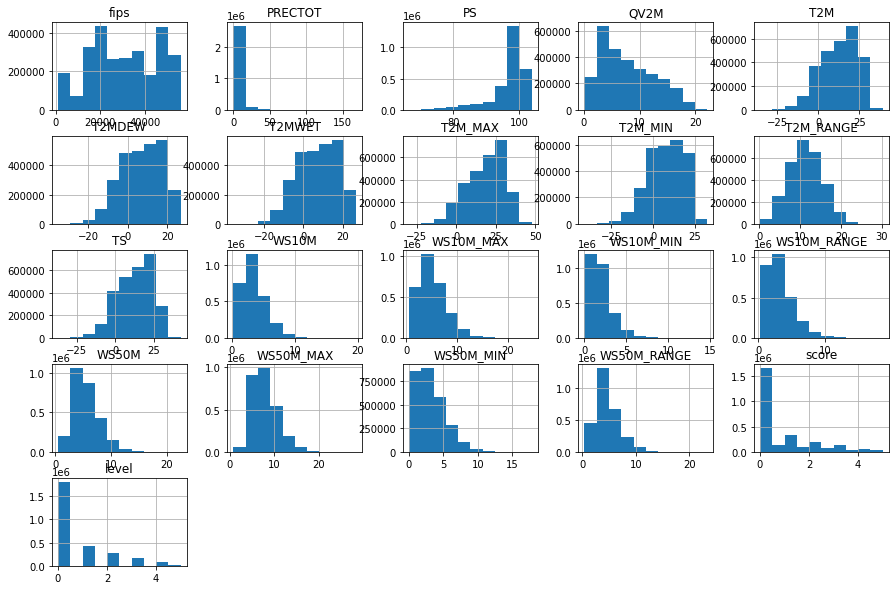

In [9]:
train.hist(figsize=(15, 10))

In [10]:
# county=county.iloc[:, 0:3].dropna()
# county['FIPS']= county['FIPS'].astype(int)
# county.dropna()

In [11]:
# from google.colab import drive
# drive.mount('/content/drive')

In [12]:
# train= pd.read_csv('/content/drive/MyDrive/423 Big Data Analytics/Final Project/test_timeseries.csv') # 2017-2018
# test= pd.read_csv('/content/drive/MyDrive/423 Big Data Analytics/Final Project/validation_timeseries.csv') # 2019-2020

In [13]:
# train['fips']=train.fips.astype(int)
# train= pd.merge(left=county, right=train, how='right', left_on='FIPS', right_on='fips')

In [14]:
# train=train.drop(columns= ['FIPS'])

In [15]:
soil

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,slope7,slope8,aspectN,aspectE,aspectS,aspectW,aspectUnknown,WAT_LAND,NVG_LAND,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0000,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.288900,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
1,1005,31.870670,-85.405456,146,0.0158,0.1868,0.5441,0.2424,0.0106,0.0003,0.0000,0.0000,0.1415,0.2379,0.2183,0.1997,0.2026,0.0000,0.000000,0.414600,2.225602,22.952839,72.578804,1.828159,74.406960,3,2,1,1,1,1,1
2,1003,30.659218,-87.746067,52,0.0746,0.4370,0.4415,0.0469,0.0000,0.0000,0.0000,0.0000,0.1168,0.1386,0.1048,0.1282,0.5116,0.0000,0.000000,3.501000,4.972456,28.685991,59.843639,2.996914,62.840553,3,2,1,2,1,1,1
3,1007,33.015893,-87.127148,93,0.0144,0.1617,0.3714,0.3493,0.0898,0.0134,0.0000,0.0000,0.1971,0.1885,0.2279,0.2104,0.1761,0.0000,0.000000,0.228300,8.674664,89.172112,1.916593,0.008330,1.924924,3,2,1,1,1,1,1
4,1009,33.977448,-86.567246,198,0.0050,0.0872,0.2799,0.3576,0.1477,0.1037,0.0189,0.0000,0.2569,0.1503,0.2028,0.2978,0.0922,0.0000,0.000000,1.003700,8.606856,88.470047,1.891909,0.027488,1.919397,3,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3104,56037,41.660339,-108.875676,2085,0.0016,0.0281,0.1763,0.3554,0.2121,0.2097,0.0168,0.0000,0.3492,0.1112,0.2760,0.2339,0.0297,0.0000,32.800003,0.000000,67.199997,0.000000,0.000000,0.000000,0.000000,1,1,3,1,1,1,3
3105,56039,44.049321,-110.588102,2564,0.0003,0.0026,0.0166,0.0722,0.1489,0.5005,0.2138,0.0451,0.1741,0.3230,0.2427,0.2573,0.0029,0.0000,0.000000,0.004600,14.530160,82.542931,2.922309,0.000000,2.922309,1,1,1,1,1,1,1
3106,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,0.0003,0.0000,0.2552,0.2011,0.1525,0.3408,0.0504,0.0000,33.000000,0.000000,67.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1,1,1,1
3107,56041,41.284726,-110.558947,2327,0.0050,0.2009,0.4063,0.1858,0.0964,0.1031,0.0025,0.0000,0.2519,0.2918,0.0507,0.1997,0.2059,0.0000,4.532186,0.024343,14.042342,69.631836,1.013702,10.755590,11.769293,1,1,2,1,1,1,2


In [16]:
train = pd.merge(left=soil, right=train, how='right', left_on='fips', right_on='fips')

In [17]:
train.isna().sum()

fips             0
lat              0
lon              0
elevation        0
slope1           0
slope2           0
slope3           0
slope4           0
slope5           0
slope6           0
slope7           0
slope8           0
aspectN          0
aspectE          0
aspectS          0
aspectW          0
aspectUnknown    0
WAT_LAND         0
NVG_LAND         0
URB_LAND         0
GRS_LAND         0
FOR_LAND         0
CULTRF_LAND      0
CULTIR_LAND      0
CULT_LAND        0
SQ1              0
SQ2              0
SQ3              0
SQ4              0
SQ5              0
SQ6              0
SQ7              0
date             0
PRECTOT          0
PS               0
QV2M             0
T2M              0
T2MDEW           0
T2MWET           0
T2M_MAX          0
T2M_MIN          0
T2M_RANGE        0
TS               0
WS10M            0
WS10M_MAX        0
WS10M_MIN        0
WS10M_RANGE      0
WS50M            0
WS50M_MAX        0
WS50M_MIN        0
WS50M_RANGE      0
score            0
level       

In [18]:
train.set_index('date')
train

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,slope7,slope8,aspectN,aspectE,aspectS,aspectW,aspectUnknown,WAT_LAND,NVG_LAND,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,level
0,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0,1
1,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2,2000-01-11,1.33,100.40,6.63,11.48,7.84,7.84,18.88,5.72,13.16,10.43,1.76,2.48,1.05,1.43,3.55,6.38,1.71,4.67,2.0,2
2,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2,2000-01-18,1.11,100.39,9.53,14.28,13.26,13.26,18.04,8.98,9.06,14.19,2.63,3.60,1.67,1.92,5.19,6.40,3.84,2.55,2.0,2
3,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2,2000-01-25,0.00,100.11,2.05,-0.78,-7.93,-7.72,5.65,-5.46,11.11,-0.61,3.35,4.59,2.28,2.32,5.75,8.03,3.96,4.07,2.0,2
4,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2,2000-02-01,0.00,101.00,3.36,2.06,-1.73,-1.70,11.02,-4.21,15.23,1.88,2.03,2.74,0.88,1.86,4.18,6.38,1.27,5.11,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756791,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,0.0003,0.0,0.2552,0.2011,0.1525,0.3408,0.0504,0.0000,33.000000,0.0000,67.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1,1,1,1,2016-11-29,0.04,82.47,2.19,-4.27,-9.36,-9.26,-1.51,-7.22,5.71,-4.38,6.93,10.27,3.08,7.18,9.42,12.59,5.62,6.97,0.0,0
2756792,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,0.0003,0.0,0.2552,0.2011,0.1525,0.3408,0.0504,0.0000,33.000000,0.0000,67.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1,1,1,1,2016-12-06,0.13,82.59,0.91,-11.96,-18.65,-17.90,-6.85,-15.24,8.39,-11.98,2.27,3.97,0.95,3.02,3.07,5.16,0.83,4.33,0.0,0
2756793,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,0.0003,0.0,0.2552,0.2011,0.1525,0.3408,0.0504,0.0000,33.000000,0.0000,67.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1,1,1,1,2016-12-13,0.02,82.86,1.40,-9.56,-14.18,-13.95,-2.69,-13.01,10.32,-10.95,3.64,6.59,1.28,5.31,5.33,8.35,2.13,6.22,0.0,0
2756794,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,0.0003,0.0,0.2552,0.2011,0.1525,0.3408,0.0504,0.0000,33.000000,0.0000,67.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1,1,1,1,2016-12-20,0.32,83.12,2.73,-2.55,-6.90,-6.84,2.66,-7.77,10.42,-3.94,6.16,8.43,3.44,4.99,8.99,10.14,6.67,3.47,0.0,0


In [19]:
train= train.drop(['date'],axis= 1)

In [20]:
train.columns.values

array(['fips', 'lat', 'lon', 'elevation', 'slope1', 'slope2', 'slope3',
       'slope4', 'slope5', 'slope6', 'slope7', 'slope8', 'aspectN',
       'aspectE', 'aspectS', 'aspectW', 'aspectUnknown', 'WAT_LAND',
       'NVG_LAND', 'URB_LAND', 'GRS_LAND', 'FOR_LAND', 'CULTRF_LAND',
       'CULTIR_LAND', 'CULT_LAND', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5',
       'SQ6', 'SQ7', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score', 'level'], dtype=object)

In [21]:
train

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,slope7,slope8,aspectN,aspectE,aspectS,aspectW,aspectUnknown,WAT_LAND,NVG_LAND,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,level
0,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0,1
1,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2,1.33,100.40,6.63,11.48,7.84,7.84,18.88,5.72,13.16,10.43,1.76,2.48,1.05,1.43,3.55,6.38,1.71,4.67,2.0,2
2,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2,1.11,100.39,9.53,14.28,13.26,13.26,18.04,8.98,9.06,14.19,2.63,3.60,1.67,1.92,5.19,6.40,3.84,2.55,2.0,2
3,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2,0.00,100.11,2.05,-0.78,-7.93,-7.72,5.65,-5.46,11.11,-0.61,3.35,4.59,2.28,2.32,5.75,8.03,3.96,4.07,2.0,2
4,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2,0.00,101.00,3.36,2.06,-1.73,-1.70,11.02,-4.21,15.23,1.88,2.03,2.74,0.88,1.86,4.18,6.38,1.27,5.11,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756791,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,0.0003,0.0,0.2552,0.2011,0.1525,0.3408,0.0504,0.0000,33.000000,0.0000,67.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1,1,1,1,0.04,82.47,2.19,-4.27,-9.36,-9.26,-1.51,-7.22,5.71,-4.38,6.93,10.27,3.08,7.18,9.42,12.59,5.62,6.97,0.0,0
2756792,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,0.0003,0.0,0.2552,0.2011,0.1525,0.3408,0.0504,0.0000,33.000000,0.0000,67.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1,1,1,1,0.13,82.59,0.91,-11.96,-18.65,-17.90,-6.85,-15.24,8.39,-11.98,2.27,3.97,0.95,3.02,3.07,5.16,0.83,4.33,0.0,0
2756793,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,0.0003,0.0,0.2552,0.2011,0.1525,0.3408,0.0504,0.0000,33.000000,0.0000,67.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1,1,1,1,0.02,82.86,1.40,-9.56,-14.18,-13.95,-2.69,-13.01,10.32,-10.95,3.64,6.59,1.28,5.31,5.33,8.35,2.13,6.22,0.0,0
2756794,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,0.0003,0.0,0.2552,0.2011,0.1525,0.3408,0.0504,0.0000,33.000000,0.0000,67.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1,1,1,1,0.32,83.12,2.73,-2.55,-6.90,-6.84,2.66,-7.77,10.42,-3.94,6.16,8.43,3.44,4.99,8.99,10.14,6.67,3.47,0.0,0


## undersampling for inbalanced classification

In [22]:
train['level'].value_counts()

0    1794623
1     424353
2     265995
3     169049
4      80970
5      21806
Name: level, dtype: int64

In [23]:
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

Class=1, n=424353 (15.393%)
Class=2, n=265995 (9.649%)
Class=0, n=1794623 (65.098%)
Class=3, n=169049 (6.132%)
Class=4, n=80970 (2.937%)
Class=5, n=21806 (0.791%)


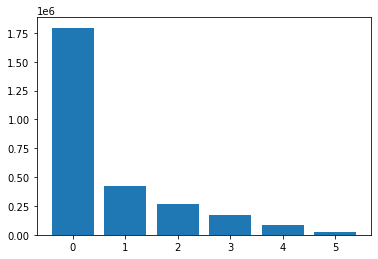

In [24]:
data = train.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [25]:
pip install imbalanced-learn

In [26]:
import warnings
warnings.filterwarnings("ignore")
from imblearn.under_sampling import NearMiss# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# transform the dataset
undersample = NearMiss(version=1)
X, y = undersample.fit_resample(X, y)

Class=0, n=21806 (16.667%)
Class=1, n=21806 (16.667%)
Class=2, n=21806 (16.667%)
Class=3, n=21806 (16.667%)
Class=4, n=21806 (16.667%)
Class=5, n=21806 (16.667%)


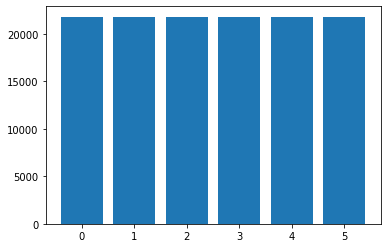

In [27]:
from collections import Counter
from matplotlib import pyplot
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

# Data Modeling

In [28]:
# test data
test = pd.merge(left=soil, right=test, how='right', left_on='fips', right_on='fips')
test= test.drop(['date'],axis= 1)
# create a drought level column
level=[]
for i in test['score']:
     level.append(math.floor(i))
test['level'] = level
test

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,slope7,slope8,aspectN,aspectE,aspectS,aspectW,aspectUnknown,WAT_LAND,NVG_LAND,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,level
0,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,6.46,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,0.0000,0
1,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2,0.05,100.57,8.75,13.15,12.01,11.98,20.04,9.36,10.68,13.05,2.33,3.40,1.68,1.72,5.13,6.51,3.67,2.85,0.0000,0
2,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2,0.00,101.07,4.04,3.91,0.94,0.96,9.40,1.02,8.38,3.91,1.73,2.40,1.36,1.04,3.28,4.13,2.39,1.75,0.0000,0
3,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2,0.03,101.14,4.96,6.03,3.81,3.08,12.43,-1.63,14.06,6.08,3.68,4.57,2.49,2.07,6.65,8.56,5.01,3.55,0.0000,0
4,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2,5.79,100.36,3.69,2.23,-0.41,-1.03,7.33,-5.19,12.52,2.18,3.10,4.52,1.71,2.81,5.62,6.96,3.60,3.35,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326335,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,0.0003,0.0,0.2552,0.2011,0.1525,0.3408,0.0504,0.0000,33.000000,0.0000,67.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1,1,1,1,1.24,83.55,2.58,-2.42,-7.58,-5.00,0.38,-6.79,7.17,-2.74,5.42,8.52,2.85,5.68,7.81,10.34,5.13,5.21,3.5109,3
326336,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,0.0003,0.0,0.2552,0.2011,0.1525,0.3408,0.0504,0.0000,33.000000,0.0000,67.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1,1,1,1,0.00,83.70,2.05,1.32,-10.65,-4.67,8.08,-3.27,11.35,-1.57,3.05,3.85,2.36,1.49,4.73,6.30,3.85,2.45,3.5109,3
326337,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,0.0003,0.0,0.2552,0.2011,0.1525,0.3408,0.0504,0.0000,33.000000,0.0000,67.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1,1,1,1,0.14,82.90,2.04,-5.19,-10.64,-7.91,0.29,-8.63,8.93,-6.81,2.88,3.90,1.68,2.21,4.39,6.50,2.83,3.66,3.5182,3
326338,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,0.0003,0.0,0.2552,0.2011,0.1525,0.3408,0.0504,0.0000,33.000000,0.0000,67.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1,1,1,1,1.64,82.00,3.13,-0.05,-5.29,-2.67,6.87,-7.05,13.93,-0.82,8.83,13.78,6.64,7.14,11.90,17.31,9.05,8.25,3.5182,3


In [29]:
data=test.values
X_test, y_test = data[:, :-1], data[:, -1]

## Random Forest

In [30]:
# evaluate a model
def evaluate_model(X, y, model):
# define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [ ]:
start_time = time.time()

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
# define the reference model
rf = RandomForestClassifier(n_estimators=1000,class_weight='balanced')
rf.fit(X, y)
y_pred_1 = rf.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

## KNN

In [32]:
start_time = time.time()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred_2 = knn.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

## Neural Network

In [33]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes = [100]*5)

start_time = time.time()
nn.fit(X, y)
y_pred_3 = nn.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

## Support Vector Machine

In [34]:
from sklearn.svm import SVC
svc = SVC(decision_function_shape='ovr')

start_time = time.time()

svc.fit(X, y)
y_pred_4 = svc.predict(X_test)

print("--- %s seconds ---" % (time.time() - start_time))

## XGBoost

In [37]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

start_time = time.time()

xgb.fit(X, y)
y_pred_5 = xgb.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 115.96024584770203 seconds ---


# Model Evaluation 

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [57]:
start_time = time.time()

confusion_matrix_1 = confusion_matrix(y_test, y_pred_1)
#roc_1 = roc_auc_score(y_test, y_pred_1 )  #ROC AUC Score
precision_1 = precision_score(y_test, y_pred_1,average= 'macro' )  #Precision Score
recall_1 = recall_score(y_test, y_pred_1,average= 'macro' )  #Recall Score
f1_1 = f1_score(y_test, y_pred_1,average= 'macro' )  #F1 Score
print(confusion_matrix_1)
#print('ROC AUC Score:',round(roc_1,2))
print('Precision Score:',round(precision_1,2))
print('Recall Score:',round(recall_1,2))
print('f1 Score:',round(f1_1,2))

print("--- %s seconds ---" % (time.time() - start_time))

[[262199   3052    316    333     42    275]
 [     1  34473     70      3      0      5]
 [     0     23  16620     42      0     13]
 [     0      0      1   6676     13      1]
 [     0      0      0      2   1955      0]
 [     0      0      0      0      0    225]]
Precision Score: 0.87
Recall Score: 1.0
f1 Score: 0.92
--- 0.69930100440979 seconds ---


In [64]:
start_time = time.time()

confusion_matrix_2 = confusion_matrix(y_test, y_pred_2)
#roc_1 = roc_auc_score(y_test, y_pred_1 )  #ROC AUC Score
precision_2 = precision_score(y_test, y_pred_2,average= 'macro' )  #Precision Score
recall_2 = recall_score(y_test, y_pred_2,average= 'macro' )  #Recall Score
f1_2 = f1_score(y_test, y_pred_2,average= 'macro' )  #F1 Score
print(confusion_matrix_2)
#print('ROC AUC Score:',round(roc_1,2))
print('Precision Score:',round(precision_2,2))
print('Recall Score:',round(recall_2,2))
print('f1 Score:',round(f1_2,2))

print("--- %s seconds ---" % (time.time() - start_time))

[[ 16038  27170  17427  28697  37271 139614]
 [  1828   3439   3144   4396   6074  15671]
 [   652   1426   1907   2661   3828   6224]
 [   166    518    757   1355   1835   2060]
 [     7     73    126    563    716    472]
 [     0      5      4     52     98     66]]
Precision Score: 0.18
Recall Score: 0.19
f1 Score: 0.07
--- 0.7312510013580322 seconds ---


In [87]:
start_time = time.time()

confusion_matrix_3 = confusion_matrix(y_test, y_pred_3)
#roc_1 = roc_auc_score(y_test, y_pred_1 )  #ROC AUC Score
precision_3 = precision_score(y_test, y_pred_3,average= 'macro' )  #Precision Score
recall_3 = recall_score(y_test, y_pred_3,average= 'macro' )  #Recall Score
f1_3 = f1_score(y_test, y_pred_3,average= 'macro' )  #F1 Score
print(confusion_matrix_3)
#print('ROC AUC Score:',round(roc_1,2))
print('Precision Score:',round(precision_3,2))
print('Recall Score:',round(recall_3,2))
print('f1 Score:',round(f1_3,2))

print("--- %s seconds ---" % (time.time() - start_time))

[[  6258    126      0      0 259833      0]
 [    63    506     14      0  33969      0]
 [     4     46    152     10  16486      0]
 [     0      0      0     31   6660      0]
 [     0      0      0      0   1957      0]
 [     0      0      0      0    225      0]]
Precision Score: 0.57
Recall Score: 0.18
f1 Score: 0.02
--- 0.6993007659912109 seconds ---


In [66]:
start_time = time.time()

confusion_matrix_4 = confusion_matrix(y_test, y_pred_4)
#roc_1 = roc_auc_score(y_test, y_pred_1 )  #ROC AUC Score
precision_4 = precision_score(y_test, y_pred_4,average= 'macro' )  #Precision Score
recall_4 = recall_score(y_test, y_pred_4,average= 'macro' )  #Recall Score
f1_4 = f1_score(y_test, y_pred_4,average= 'macro' )  #F1 Score
print(confusion_matrix_4)
#print('ROC AUC Score:',round(roc_1,2))
print('Precision Score:',round(precision_4,2))
print('Recall Score:',round(recall_4,2))
print('f1 Score:',round(f1_4,2))

print("--- %s seconds ---" % (time.time() - start_time))

[[ 29482      0      0  32257  35761 168717]
 [  4823      0      0   5205   3744  20780]
 [  3123      0      0   1191   1773  10611]
 [  1999      0      0    243    558   3891]
 [   853      0      0     14     59   1031]
 [    85      0      0      0      0    140]]
Precision Score: 0.12
Recall Score: 0.13
f1 Score: 0.03
--- 0.6669633388519287 seconds ---


In [67]:
start_time = time.time()

confusion_matrix_5 = confusion_matrix(y_test, y_pred_5)
#roc_1 = roc_auc_score(y_test, y_pred_1 )  #ROC AUC Score
precision_5 = precision_score(y_test, y_pred_5,average= 'macro' )  #Precision Score
recall_5 = recall_score(y_test, y_pred_5,average= 'macro' )  #Recall Score
f1_5 = f1_score(y_test, y_pred_5,average= 'macro' )  #F1 Score
print(confusion_matrix_5)
#print('ROC AUC Score:',round(roc_1,2))
print('Precision Score:',round(precision_5,2))
print('Recall Score:',round(recall_5,2))
print('f1 Score:',round(f1_5,2))

print("--- %s seconds ---" % (time.time() - start_time))

[[266217      0      0      0      0      0]
 [     0  34552      0      0      0      0]
 [     0      0  16698      0      0      0]
 [     0      0      0   6691      0      0]
 [     0      0      0      0   1957      0]
 [     0      0      0      0      0    225]]
Precision Score: 1.0
Recall Score: 1.0
f1 Score: 1.0
--- 0.7209689617156982 seconds ---


# Validation

In [68]:
# validate data
validate = pd.merge(left=soil, right=validate, how='right', left_on='fips', right_on='fips')
validate= validate.drop(['date'],axis= 1)
# create a drought level column
level=[]
for i in validate['score']:
     level.append(math.floor(i))
validate['level'] = level
validate

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,slope7,slope8,aspectN,aspectE,aspectS,aspectW,aspectUnknown,WAT_LAND,NVG_LAND,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,level
0,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2,18.82,99.69,9.74,14.24,13.44,13.44,18.48,9.29,9.20,14.06,2.25,3.73,1.64,2.09,4.80,7.27,2.54,4.72,2.0000,2
1,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2,0.02,101.13,5.62,5.92,4.54,4.55,12.42,-2.37,14.79,5.81,3.22,4.24,2.52,1.72,6.19,7.55,4.68,2.86,2.0000,2
2,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2,0.14,100.60,11.41,17.21,16.06,16.06,23.03,13.15,9.88,17.10,2.24,3.61,1.71,1.90,4.93,5.90,2.76,3.15,2.0000,2
3,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2,0.00,99.72,5.60,9.27,5.34,5.35,16.23,4.18,12.06,8.95,1.82,2.34,1.03,1.31,3.52,6.49,1.47,5.02,1.0000,1
4,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2,0.00,100.37,7.31,11.38,9.21,9.21,20.29,5.05,15.24,11.32,2.31,3.00,1.76,1.24,5.00,7.40,2.88,4.52,1.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323227,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,0.0003,0.0,0.2552,0.2011,0.1525,0.3408,0.0504,0.0000,33.000000,0.0000,67.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1,1,1,1,0.21,82.62,2.88,-0.63,-6.30,-6.25,5.40,-5.43,10.83,-1.94,3.80,5.44,2.93,2.51,6.21,9.43,4.63,4.80,0.2572,0
323228,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,0.0003,0.0,0.2552,0.2011,0.1525,0.3408,0.0504,0.0000,33.000000,0.0000,67.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1,1,1,1,0.01,83.32,1.47,-7.66,-14.71,-13.42,-1.41,-11.86,10.45,-8.96,3.26,5.23,2.20,3.03,4.82,6.46,3.79,2.67,0.2572,0
323229,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,0.0003,0.0,0.2552,0.2011,0.1525,0.3408,0.0504,0.0000,33.000000,0.0000,67.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1,1,1,1,0.06,82.94,2.12,-3.04,-10.21,-9.60,2.45,-6.68,9.13,-4.08,3.59,5.09,2.07,3.01,5.69,8.44,3.42,5.01,0.2572,0
323230,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,0.0003,0.0,0.2552,0.2011,0.1525,0.3408,0.0504,0.0000,33.000000,0.0000,67.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1,1,1,1,0.06,82.77,3.09,0.69,-5.36,-5.17,5.77,-4.12,9.89,-1.31,3.64,4.69,2.04,2.65,5.79,7.52,3.47,4.05,0.2572,0


In [69]:
data=validate.values
X_validate, y_validate = data[:, :-1], data[:, -1]

In [85]:
y_pred_validate_1 = xgb.predict(X_validate)

start_time = time.time()

confusion_matrix_validate_1 = confusion_matrix(y_validate, y_pred_validate_1)
#roc_1 = roc_auc_score(y_test, y_pred_1 )  #ROC AUC Score
precision_validate_1 = precision_score(y_validate, y_pred_validate_1,average= 'macro' )  #Precision Score
recall_validate_1 = recall_score(y_validate, y_pred_validate_1,average= 'macro' )  #Recall Score
f1_validate_1 = f1_score(y_validate, y_pred_validate_1,average= 'macro' )  #F1 Score
print(confusion_matrix_validate_1)
#print('ROC AUC Score:',round(roc_1,2))
print('Precision Score:',round(precision_validate_1,2))
print('Recall Score:',round(recall_validate_1,2))
print('f1 Score:',round(f1_validate_1,2))

print("--- %s seconds ---" % (time.time() - start_time))

[[242143      0      0      0      0      0]
 [     0  48312      0      0      0      0]
 [     0      0  21025      0      0      0]
 [     0      0      0   8732      0      0]
 [     0      0      0      0   2713      0]
 [     0      0      0      0      0    307]]
Precision Score: 1.0
Recall Score: 1.0
f1 Score: 1.0
--- 0.6690378189086914 seconds ---


In [84]:
start_time = time.time()
y_pred_validate_5 = rf.predict(X_validate)


confusion_matrix__validate_5 = confusion_matrix(y_validate, y_pred_validate_5)
#roc_1 = roc_auc_score(y_test, y_pred_1 )  #ROC AUC Score
precision__validate_5 = precision_score(y_validate, y_pred_validate_5,average= 'macro' )  #Precision Score
recall__validate_5 = recall_score(y_validate, y_pred_validate_5,average= 'macro' )  #Recall Score
f1__validate_5 = f1_score(y_validate, y_pred_validate_5,average= 'macro' )  #F1 Score
print(confusion_matrix__validate_5)
#print('ROC AUC Score:',round(roc_1,2))
print('Precision Score:',round(precision__validate_5,2))
print('Recall Score:',round(recall__validate_5,2))
print('f1 Score:',round(f1__validate_5,2))

print("--- %s seconds ---" % (time.time() - start_time))

[[239000   2523    279    242     18     81]
 [     0  48147    153      8      0      4]
 [     0     14  20924     70      5     12]
 [     0      1      5   8687     38      1]
 [     0      0      0      0   2709      4]
 [     0      0      0      0      0    307]]
Precision Score: 0.94
Recall Score: 1.0
f1 Score: 0.96
--- 62.136377811431885 seconds ---


# Visualization 

In [ ]:
train_Day1 = train[train['date']=='2019-01-01']
train_Day1

In [ ]:
# https://plotly.com/python/county-choropleth/

In [ ]:
colorscale = ['#FFFFFF','#FFFF00','#FCD37F','#FFAA00','#E60000','#730000']

endpts = list(np.linspace(0, 4, len(colorscale) - 1))
fips = train_Day1['fips'].tolist()
values = train_Day1['score'].tolist()


fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, 
    show_state_data = True,
    county_outline={'color': 'rgb(15, 15, 55)', 'width': 0.5},
    title='Drought Level of day 1',
    legend_title='Drought score')


fig.layout.template = None
fig.show()

In [ ]:
score= train.dropna()
score

In [ ]:
#https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a